In [2]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [3]:
# read in the states data
states_df = pd.read_csv("db/states_energy.csv")
states_df.head()

,Unnamed: 0,State,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollars),Population(Thousand),Energy Price(dollars per million btu)
0,0,Alaska,1970,8835.0,182039.0,0.0,304.0,1.39
1,1,Alabama,1970,132471.0,1393497.0,0.0,3451.0,1.37
2,2,Arkansas,1970,56933.0,708904.0,0.0,1932.0,1.51
3,3,Arizona,1970,68919.0,520401.0,0.0,1792.0,1.97
4,4,California,1970,521978.0,5499139.0,0.0,20007.0,1.74


In [4]:
# Drop Consumption from the table
states_df = states_df.drop(['Unnamed: 0'], axis=1)
states_df = states_df.rename(columns={'Produced Renewable(Billion Btu)': 'Prod. Renewable (Bil. Btu)',
                                      'Total Consumed(Billion Btu)': 'Total Consumed (Bil. Btu)',
                                     'GDP(Million dollars)': 'GDP (Millions)', 'Population(Thousand)' : 'Pop. (1000s)',
                                     'Energy Price(dollars per million btu)': 'Energy Pr. ($/mil. btu)'})

states_df.head()

,State,Year,Prod. Renewable (Bil. Btu),Total Consumed (Bil. Btu),GDP (Millions),Pop. (1000s),Energy Pr. ($/mil. btu)
0,Alaska,1970,8835.0,182039.0,0.0,304.0,1.39
1,Alabama,1970,132471.0,1393497.0,0.0,3451.0,1.37
2,Arkansas,1970,56933.0,708904.0,0.0,1932.0,1.51
3,Arizona,1970,68919.0,520401.0,0.0,1792.0,1.97
4,California,1970,521978.0,5499139.0,0.0,20007.0,1.74


In [5]:
# Create test state df for North Carolina

nc_df = states_df.loc[(states_df['Year'] >= 1997) & (states_df['State'] == 'North Carolina')]
display(nc_df.head())
# display(nc_df.tail())
nc_df.loc[nc_df['Year'] == 2017, 'Prod. Renewable (Bil. Btu)'].values[0]

,State,Year,Prod. Renewable (Bil. Btu),Total Consumed (Bil. Btu),GDP (Millions),Pop. (1000s),Energy Pr. ($/mil. btu)
1404,North Carolina,1997,164819.0,2420159.0,316366.0,7657.0,10.04
1455,North Carolina,1998,159627.0,2463893.0,326225.0,7809.0,9.46
1506,North Carolina,1999,139731.0,2473188.0,344425.0,7949.0,9.80
1557,North Carolina,2000,136234.0,2587792.0,354846.0,8082.0,11.51
1608,North Carolina,2001,127348.0,2534318.0,361354.0,8210.0,11.67


217876.0

# Multiple Liner Regression (MLR) Test

In [6]:
# Find future value for one state - North Carolina
# Test is run on Produced Renewable Column using simple LR

# Select X & y values
X = nc_df[['Year']].values.reshape(-1,1)
y = nc_df[['Prod. Renewable (Bil. Btu)']].values.reshape(-1,1)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (21, 1)
y shape: (21, 1)


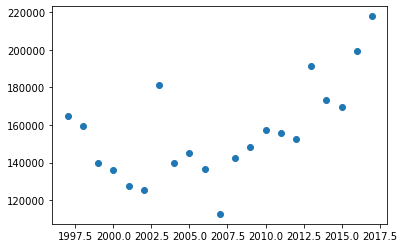

In [7]:
# Plot the data for a quick visual... is it linear? 

plt.scatter(X,y)

In [8]:
# Split the data into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [9]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
#Find the best test scores

# import operator

# # Create For loop to find the best avg. test score for NC
# test_scores = []
# high_score = [] 
# high_seed = []


# def mean(array):
#     length_arr = len(array)
#     sum_arr = sum(array)
    
#     return sum_arr / length_arr

# for seed in range(0,101):
    
#     X = nc_df[['Year']].values.reshape(-1,1)
#     y = nc_df[['Prod. Renewable (Bil. Btu)']].values.reshape(-1,1)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= seed)

#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     training_score = model.score(X_train, y_train)
#     testing_score = model.score(X_test, y_test)
    
#     test_scores.append(testing_score)
    
#     print(f'Seed: {seed}, Test Score: {testing_score}')
    
    
#     seed += 1
    

# print('''''')    
# print(f'Best Testing Score: {max(test_scores)}')

In [12]:
# Best seed is 56
# Use our model to make predictions
from sklearn.metrics import mean_squared_error, r2_score


predicted = model.predict(X_test)

In [13]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


predictions = model.predict(X_test[:5])
print(f"Predicted classes: {predictions}")

n_2021 = model.predict([[2021]])
n_2025 = model.predict([[2025]])
n_2030 = model.predict([[2030]])

print('''''')
print(f"North Carolina's Renewable Production in 2017: {int(nc_df.loc[nc_df['Year'] == 2017, 'Prod. Renewable (Bil. Btu)'].values[0])}")

print('''''')      
print(f'Prediction for 2021: {int(n_2021[0][0])}')
      
print('''''')      
print(f'Prediction for 2021: {int(n_2025[0][0])}')
      
print('''''')      
print(f'Prediction for 2021: {int(n_2030[0][0])}')

Mean Squared Error (MSE): 119067995.14840044
R-squared (R2 ): 0.6311980113673878
Predicted classes: [[166109.34551887]
 [170904.92216981]
 [175700.49882076]
 [149324.82724057]
 [137335.88561321]]

North Carolina's Renewable Production in 2017: 217876

Prediction for 2021: 190087

Prediction for 2021: 199678

Prediction for 2021: 211667


# R2 scores for features

In [14]:
# # Find best R2 Scores

# # read in data
# states_df = pd.read_csv("db/states_energy.csv")
# states_df = states_df.drop(['Unnamed: 0'], axis=1)
# states_df = states_df.rename(columns={'Produced Renewable(Billion Btu)': 'Prod. Renewable (Bil. Btu)',
#                                       'Total Consumed(Billion Btu)': 'Total Consumed (Bil. Btu)',
#                                      'GDP(Million dollars)': 'GDP (Millions)', 'Population(Thousand)' : 'Pop. (1000s)',
#                                      'Energy Price(dollars per million btu)': 'Energy Pr. ($/mil. btu)'})




# # Get arrays of states, scores
# states = states_df["State"].unique()
# rp_r2_scores = []
# rp_r2_averages = []

# GDP_r2_scores = []
# GDP_r2_averages = []

# pop_r2_scores = []
# pop_r2_averages = []

# ep_r2_scores = []
# ep_r2_averages = []


# # Create mean function
# def mean(array):
#     length_arr = len(array)
#     sum_arr = sum(array)
    
#     return sum_arr / length_arr


# #Create the Loop


# for n in range(101):
#     for state in states:
        
#         # Select the state & year
#         states_df = states_df.loc[(states_df["State"] == state) & (states_df["Year"] >= 1970)]
        
        
#         # Renewable Production #
#         #======================#
        
        
#         # Select X & y for Renewable Production (RP) and reshape for each state
#         rp_X = states_df[['Year']].values.reshape(-1,1)
#         rp_y = states_df[['Prod. Renewable (Bil. Btu)']].values.reshape(-1,1)
        
#         # Split RP Data into training & test data
#         rp_X_train, rp_X_test, rp_y_train, rp_y_test = train_test_split(rp_X, rp_y, random_state= n)
        
#         # Create and fit the models for each state for RP
#         model = LinearRegression()
#         model.fit(rp_X_train, rp_y_train)
        
#         # Calculate the RP testing & training scores
#         rp_training_score = model.score(rp_X_train, rp_y_train)
#         rp_testing_score = model.score(rp_X_test, rp_y_test)
        
#         # Use our models to make RP predictions
#         rp_predicted = model.predict(rp_X_test)
        
#         # Score the RP predictions with mse and r2 for each state
#         rp_mse = mean_squared_error(rp_y_test, rp_predicted)
#         rp_r2 = r2_score(rp_y_test, rp_predicted)
        
#         # Populate RP r2 score array for averaging later
#         rp_r2_scores.append(rp_r2)
        
    
    


   
        
#         #  GDP  #
#         #=======#
        
        
#         # Select X & y for GDP and reshape for each state
#         GDP_X = states_df[['Year']].values.reshape(-1,1)
#         GDP_y = states_df[['GDP (Millions)']].values.reshape(-1,1)
        
#         # Split RP Data into training & test data
#         GDP_X_train, GDP_X_test, GDP_y_train, GDP_y_test = train_test_split(GDP_X, GDP_y, random_state= n)
        
#         # Create and fit the models for each state for GDP
#         model = LinearRegression()
#         model.fit(GDP_X_train, GDP_y_train)
        
#         # Calculate the GDP testing & training scores
#         GDP_training_score = model.score(GDP_X_train, GDP_y_train)
#         GDP_testing_score = model.score(GDP_X_test, GDP_y_test)
        
#         # Use our models to make GDP predictions
#         GDP_predicted = model.predict(GDP_X_test)
        
#         # Score the GDP predictions with mse and r2 for each state
#         GDP_mse = mean_squared_error(GDP_y_test, GDP_predicted)
#         GDP_r2 = r2_score(GDP_y_test, GDP_predicted)
        
#         # Populate GDP r2 score array for averaging later
#         GDP_r2_scores.append(GDP_r2)
        
        
   
        

#         #  Population  #
#         #==============#
        
        
#         # Select X & y for Population (Pop.) and reshape for each state
#         pop_X = states_df[['Year']].values.reshape(-1,1)
#         pop_y = states_df[['Pop. (1000s)']].values.reshape(-1,1)
        
#         # Split Pop. Data into training & test data
#         pop_X_train, pop_X_test, pop_y_train, pop_y_test = train_test_split(pop_X, pop_y, random_state= n)
        
#         # Create and fit the models for each state for pop
#         model = LinearRegression()
#         model.fit(pop_X_train, pop_y_train)
        
#         # Calculate the Pop. testing & training scores
#         pop_training_score = model.score(pop_X_train, pop_y_train)
#         pop_testing_score = model.score(pop_X_test, pop_y_test)
        
#         # Use our models to make Pop. predictions
#         pop_predicted = model.predict(pop_X_test)
        
#         # Score the Pop. predictions with mse and r2 for each state
#         pop_mse = mean_squared_error(pop_y_test, pop_predicted)
#         pop_r2 = r2_score(pop_y_test, pop_predicted)
        
#         # Populate Pop. r2 score array for averaging later
#         pop_r2_scores.append(pop_r2)
        
   
    
    
    
#         #  Energy Price #
#         #==============#
        
        
#         # Select X & y for Energy Price (ep) and reshape for each state
#         ep_X = states_df[['Year']].values.reshape(-1,1)
#         ep_y = states_df[['Energy Pr. ($/mil. btu)']].values.reshape(-1,1)
        
#         # Split ep Data into training & test data
#         ep_X_train, ep_X_test, ep_y_train, ep_y_test = train_test_split(ep_X, ep_y, random_state= n)
        
#         # Create and fit the models for each state for ep
#         model = LinearRegression()
#         model.fit(ep_X_train, ep_y_train)
        
#         # Calculate the ep testing & training scores
#         ep_training_score = model.score(ep_X_train, ep_y_train)
#         ep_testing_score = model.score(ep_X_test, ep_y_test)
        
#         # Use our models to make ep predictions
#         ep_predicted = model.predict(ep_X_test)
        
#         # Score the ep predictions with mse and r2 for each state
#         ep_mse = mean_squared_error(ep_y_test, ep_predicted)
#         ep_r2 = r2_score(ep_y_test, ep_predicted)
        
#         # Populate ep r2 score array for averaging later
#         ep_r2_scores.append(ep_r2)
        
#         states_df = pd.read_csv("db/states_energy.csv")
#         states_df = states_df.drop(['Unnamed: 0'], axis=1)
#         states_df = states_df.rename(columns={'Produced Renewable(Billion Btu)': 'Prod. Renewable (Bil. Btu)','Total Consumed(Billion Btu)': 'Total Consumed (Bil. Btu)',
#                                      'GDP(Million dollars)': 'GDP (Millions)', 'Population(Thousand)' : 'Pop. (1000s)',
#                                      'Energy Price(dollars per million btu)': 'Energy Pr. ($/mil. btu)'})
    
    
#     #Append average R2 scores for all features to respective lists
#     rp_r2_averages.append(mean(rp_r2_scores)) 
#     GDP_r2_averages.append(mean(GDP_r2_scores))
#     pop_r2_averages.append(mean(pop_r2_scores))
#     ep_r2_averages.append(mean(ep_r2_scores))
        
        
        
        
# #Find best RP R2 Score
# score_index = 0        
# for score in rp_r2_averages:
#     if score == max(rp_r2_averages):
#         print(f"Best Renewable Production R2 Seed: {score_index}, Best RP R2 Score: {score}")
    
#     score_index += 1
    
# # Find best GDP R2 Score
# score_index = 0        
# for score in GDP_r2_averages:
#     if score == max(GDP_r2_averages):
#         print(f"Best GDP R2 Seed: {score_index}, Best GDP R2 Score: {score}")
    
#     score_index += 1    

# #Find best pop R2 Score
# score_index = 0        
# for score in pop_r2_averages:
#     if score == max(pop_r2_averages):
#         print(f"Best Population R2 Seed: {score_index}, Best Population R2 Score: {score}")
    
#     score_index += 1 
    
# #Find best ep R2 Score
# score_index = 0        
# for score in ep_r2_averages:
#     if score == max(ep_r2_averages):
#         print(f"Best Energy Price R2 Seed: {score_index}, Best Energy Price R2 Score: {score}")
    
#     score_index += 1

In [15]:
# Using cumulative SLR, then MLR
# Best Population R2 Seed: 14, Best Population R2 Score: 0.874400136189608
# Best Energy Price R2 Seed: 14, Best Energy Price R2 Score: 0.8346945909444817
# Best GDP R2 Seed: 14, Best GDP R2 Score: 0.8353063463189668
# Best Renewable Production R2 Seed: 13, Best RP R2 Score: 0.4612600901929766

# Export to csv

In [16]:
# states_df.to_csv('db/states_complete_mlr.csv', float_format='%.1f')
# states_df.head()

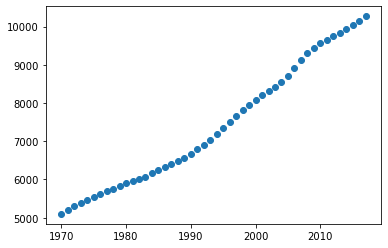

In [17]:
X= states_df.loc[states_df['State'] == "North Carolina"]

plt.scatter(X['Year'],X['Pop. (1000s)'])